# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
!pip install palmerpenguins


In [6]:
import pandas as pd
from palmerpenguins import load_penguins
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [12]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()

penguins = penguins.dropna()


cat_transform = Pipeline([
    ("dummy", OneHotEncoder())
])
pd.get_dummies(penguins[['species','island']], prefix='species').head()

,species_Adelie,species_Chinstrap,species_Gentoo,species_Biscoe,species_Dream,species_Torgersen
0,True,False,False,False,False,True
1,True,False,False,False,False,True
2,True,False,False,False,False,True
4,True,False,False,False,False,True
5,True,False,False,False,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [13]:
num_transform = Pipeline([
    ("scalar", StandardScaler())
])

ct = ColumnTransformer([
    ('num', num_transform, make_column_selector(dtype_include=np.number)),
    ("cat", cat_transform, make_column_selector(dtype_include=object))
])

X = penguins.drop(columns=['bill_depth_mm'])
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pipelinelr = Pipeline(
    [("preprocessor", ct),
     ("regressor", LinearRegression())]
     )

pipelineknn3 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsRegressor(n_neighbors=3))]
)

pipelineknn100 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsRegressor(n_neighbors=100))]
)

pipelinetree = Pipeline(
    [("preprocessor", ct),
     ("decision", DecisionTreeRegressor())]
)

pipelinelr.fit(X_train, y_train)
pipelineknn3.fit(X_train, y_train)
pipelineknn100.fit(X_train, y_train)
pipelinetree.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78838b4e4280>),
                                                 ('cat',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78838b4e5f00>)])),
                ('decision', DecisionTreeRegressor())])

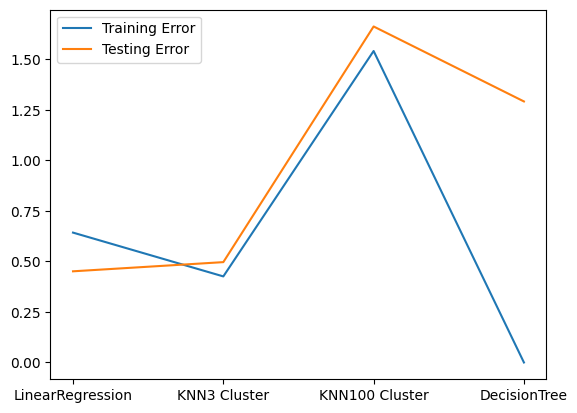

In [19]:
trainerror_lr = mean_squared_error(y_train, pipelinelr.predict(X_train))
testerror_lr = mean_squared_error(y_test, pipelinelr.predict(X_test))

trainerror_knn3 = mean_squared_error(y_train, pipelineknn3.predict(X_train))
testerror_knn3 = mean_squared_error(y_test, pipelineknn3.predict(X_test))

trainerror_knn100 = mean_squared_error(y_train, pipelineknn100.predict(X_train))
testerror_knn100 = mean_squared_error(y_test, pipelineknn100.predict(X_test))

trainerror_dt = mean_squared_error(y_train, pipelinetree.predict(X_train))
testerror_dt = mean_squared_error(y_test, pipelinetree.predict(X_test))

trainerrors = [trainerror_lr, trainerror_knn3, trainerror_knn100, trainerror_dt]
testerrors = [testerror_lr, testerror_knn3, testerror_knn100, testerror_dt]
x = range(1, 5)
plt.plot(x, trainerrors, label='Training Error')
plt.plot(x, testerrors, label='Testing Error')
plt.xticks(ticks=x, labels=['LinearRegression', 'KNN3 Cluster', 'KNN100 Cluster', 'DecisionTree'])
plt.legend()
plt.show()

Looks like KNN3 is the best model.